# Exercise 8 - Estimating $\pi$ via Sampling 

In this exercise, the goal is to estimate the value of $\pi$ from random numbers that we sample uniformly between $0$ and $1$. 
In the process, we compare the quality of the different random number generators you saw in the lecture.
We then look at the error and the mean and the law of large numbers on this example.

We want to find the value of $\pi$, other than measuring a real world circumference of a circle with a measuring tape...

The idea is to sample points in the square via $x_1\sim\mathcal{U}(-1,1)$ and $x_2\sim\mathcal{U}(-1,1)$. For a given point $(x_1,x_2)$ in the 2d plane, we can easily say whether it falls into our outside of the circle with radius $r=1$: we simply have to check that ${x_1}^2+{x_2}^2 \leq 1$.
The following is a visualization of $n$ such random points, and whether they fall inside or outside of the circle with radius 1:

![fig/circle.png](fig/circle.png)

You can already guess, the number of points that fall within the circle gives us an approximation of the circles area $a$. Since $a=\pi r^2$, we can derive the value of $\pi$ from it.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### A) Sampling from ${x_1},{x_2}\sim\mathcal{U}(-1,1)$

You have seen in the lecture that random numbers in the computer are not "random". They are actually deterministic sequences of numbers that look just random enough to be used for computational purposes. In numpy, the random generator you use is called `np.random`. In the following we generate a random number between 0 and 1:

In [2]:
np.random.uniform()

0.963553257129427

If we call the function again, it gives a different number:

In [3]:
np.random.uniform()

0.11328725945587126

However, because the underlying function is deterministic, you can always set a (pseudo-)random number generator to a state of your choice. If you start the random number generation from this exact same state, you will always get the same sequence. This feature is especially important to ensure that the code you execute can be reproduced by someone else: When they start from the same random state the program is completely deterministic and they see what you saw.

**Ex.A1** To set the random state of `numpy.random` you create a new instance of a so-called `RandomState` and call your random number methods on this state directly.

In [4]:
rs1 = np.random.RandomState(seed=1) # insert you favourite integer number here
rs1.uniform(), rs1.uniform(), rs1.uniform()

(0.417022004702574, 0.7203244934421581, 0.00011437481734488664)

In [5]:
rs2 = np.random.RandomState(seed=1) # insert you favourite integer number here
rs2.uniform(), rs2.uniform(), rs2.uniform()

(0.417022004702574, 0.7203244934421581, 0.00011437481734488664)

If you did everything correctly, the sequence of numbers generated from the same random state (here defined in terms of your favourite integer number) should be exactly the same.


We also know already, that the following cell will output `(0.3745401188473625, 0.9507143064099162, 0.7319939418114051)`, but only ...

**Ex.A2** ... if you set the seed to $42$.

In [6]:
rs = np.random.RandomState(seed=42) # set the seed to 42
rs.uniform(), rs.uniform(), rs.uniform()

(0.3745401188473625, 0.9507143064099162, 0.7319939418114051)

To generate many random numbers at the same time, we use numpy features.


**Ex.A3** Check the documentation of `np.random.uniform` online and generate an array of size `(3,3)` with random numbers between 0 and 1 using the random state `rs`.

In [7]:
rs = np.random.RandomState(seed=2808)
A = rs.uniform(size=(3,3))
A

array([[0.4834374 , 0.3004148 , 0.5718528 ],
       [0.61000788, 0.84589799, 0.76719537],
       [0.27984274, 0.72949272, 0.00476446]])

In the lecture we discussed that sampling uniformly from `[0,1]` is enough to generate numbers from any random distribution, as long as we know their inverse cdf.

**Ex.A4** What transformation do we need to apply to `A` to get numbers sampled uniformly from $[-1,1]$ instead of $[0,1]$?

In [8]:
A = A * 2 - 1
A

array([[-0.03312519, -0.3991704 ,  0.1437056 ],
       [ 0.22001576,  0.69179598,  0.53439074],
       [-0.44031451,  0.45898543, -0.99047108]])

**Ex.A5** Write a function that we will use a lot later for generating random points in the square and separating them according to whether they fall inside or ouside of the circle with radius 1.

In [9]:
def get_points(n,rs):
    # 
    # n: number of points to generate
    # rs: a random state which is used in the call to uniform
    #
    # Function which samples points uniformly with x in [-1,1] and y in [-1,1]
    # and returns two arrays containing points within and outside of the circle with radius 1
    #
    # Note that n_in_points + n_out_points = n
    #
    # returns:
    #    - circle_points: np.array of size (n_in_points, 2) with all points that fall into the circle
    #    - circle_points: np.array of size (n_out_points, 2) with all points that fall outside of the circle
    
    points = (rs.uniform(size=(n,2)) * 2) - 1
    norm = np.linalg.norm(points,axis=1)
    
    circle_idx = np.argwhere(norm<=1).flatten()
    circle_points = points[circle_idx]
    
    out_circle_idx = np.argwhere(norm>1).flatten()
    out_circle_points = points[out_circle_idx]
    
    return circle_points, out_circle_points 

In [10]:
circle_points, out_circle_points = get_points(n=10,rs=np.random.RandomState(42))
print(circle_points, out_circle_points)
f'We sampled {len(circle_points)} points in the circle, and {len(out_circle_points)} points outside.'

[[-0.25091976  0.90142861]
 [ 0.46398788  0.19731697]
 [-0.68796272 -0.68801096]
 [ 0.20223002  0.41614516]
 [ 0.66488528 -0.57532178]
 [-0.63635007 -0.63319098]
 [-0.39151551  0.04951286]
 [-0.13610996 -0.41754172]] [[-0.88383278  0.73235229]
 [-0.95883101  0.9398197 ]]


'We sampled 8 points in the circle, and 2 points outside.'

We now want to plot the points as in the image you saw at the very start of this exercise. Again, we define a function because we are going to reuse it a lot.

**Ex.A6** Implement the `plot_circle` function.

In [11]:
def plot_circle(n,rs):
    # n: number of points to generate
    # rs: a random state which is used in the call to uniform
    
    # Function which plots the samples from get_points on a 2D image and deliniates the square from which we sample
    circle_points, out_circle_points = get_points(n,rs)
    
    # scatter and label the points in and ouside of the circle in different colors
    plt.scatter(circle_points[:,0],circle_points[:,1],s=3,label='in circle')
    plt.scatter(out_circle_points[:,0],out_circle_points[:,1],s=3,label='out of circle')
    
    # show the lines of the square 
    plt.axhline(-1,c='grey')
    plt.axhline(1,c='grey')
    plt.axvline(-1,c='grey')
    plt.axvline(1,c='grey')
    
    plt.gca().set_aspect(1)
    plt.legend()

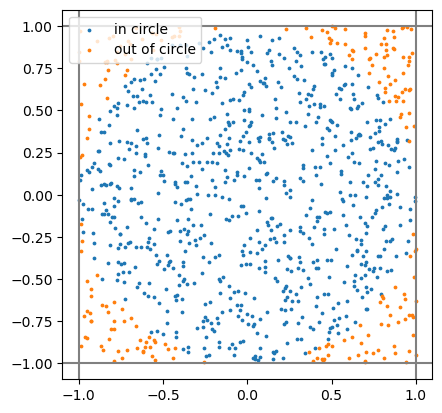

In [12]:
plot_circle(n=1000,rs=np.random.RandomState(43))

**Ex.A7** Select a different random state, to be sure that with that one you get a different sample.

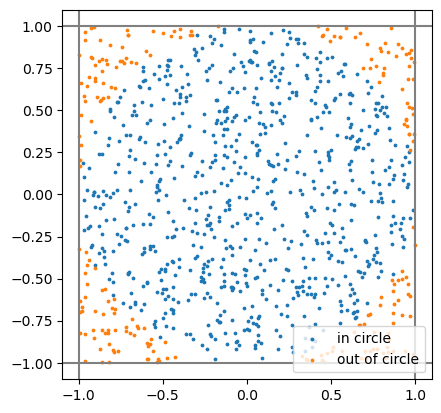

In [13]:
plot_circle(n=1000,rs=np.random.RandomState(21))

### B) Alternative Random Samplers

So far, we used the random sampler from numpy, `np.random`. As you saw in the lecture, there are many different ways of generating pseudo-random numbers. One of them is the Linear Congruential Generator, which produces a sequence of numbers according to the rule
$$
i_0 = \mathrm{seed}\\
i_{t+1} = (i_t \cdot n + k) \mod m
$$
for given positive integer values of $n, k, m$. To get a random number between 0 and 1 we just divide the current state $i$ by $m$. 

Below, we provide you with an implementation of the LCG which can be used just like the numpy random generator. 

**Ex.B1** Insert the correct update function in the LCG for `i_tp1` as defined above, in terms of `m,k,n`.

In [14]:
class LCG: 
    def __init__(self,seed=0,m=134456,k=28411,n=8121):
        self.n = n
        self.m = m
        self.k = k
        self.state = seed
        
    def uniform(self,size=None):
        if size is None:
            return self._next()
        if type(size) is tuple:
            random_num = [self._next() for _ in range(np.prod(size))]
            res = np.array(random_num).reshape(*size)
            return res
        
    def _next(self,):
        i_t = self.state
        n = self.n
        k = self.k
        m = self.m
        
        # update i_{t+1}
        i_tp1 = (i_t * n + k) % m
        
        self.state = i_tp1
        return self.state / self.m

This class can be used just like the `np.random.RandomState`:

In [15]:
rs = LCG(seed=42)
rs.uniform()

0.7480588445290652

**Ex.B2** Use this LCG random number generator to generate random numbers for the `plot_circle` function (This should only change the `rs` parameter in the function).

**Ex.B3** Compare to the plots obtained from the LCG with the one from the numpy random number generator. What do you observe?

With the default values, LCG seems to give similar results as numpy's random generator.

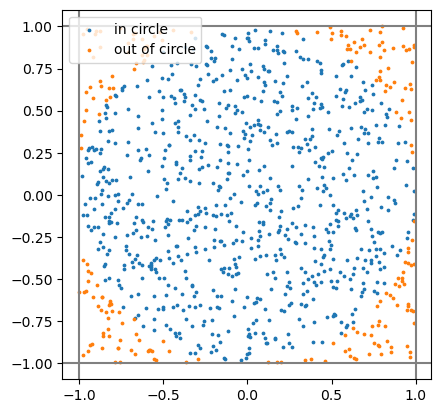

In [16]:
plot_circle(n=1000,rs=LCG(43))

The presets of `m=134456,k=28411,n=8121` are the default values in our implementation of the LCG and are known to give relatively good random numbers. However, you can change the values of $m$ and explore how your pseudo random number sequence changes. 

**Ex.B4** Add a plot like the one above, but this time changing the parameter `m` as `rs=LCG(43,m=m)`. Interesting values for `m` are for example `[290358,45896,14119105]`. You can also add your own selected seed. 

**Ex.B5** What do you observe? How do the samplers differ? Would you want to use them in practice?

By changing the values of $m$ for the LCG, we see that the obtained values seem not to be uniform. Thus, we would avoid using these values of $m$ in practice.

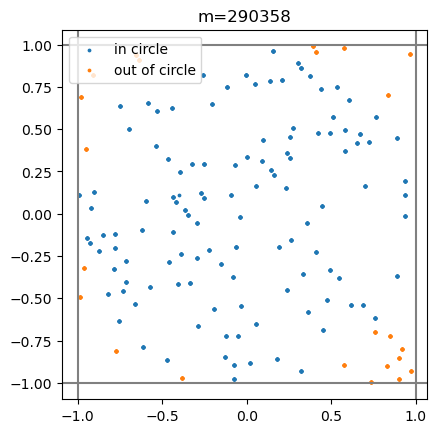

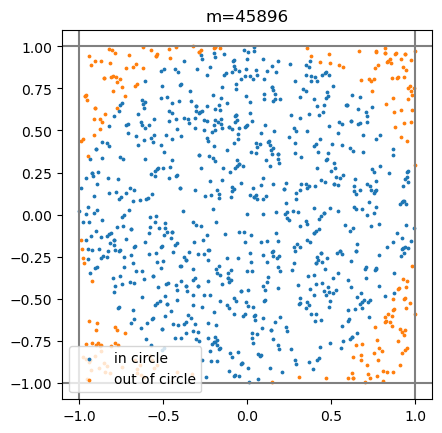

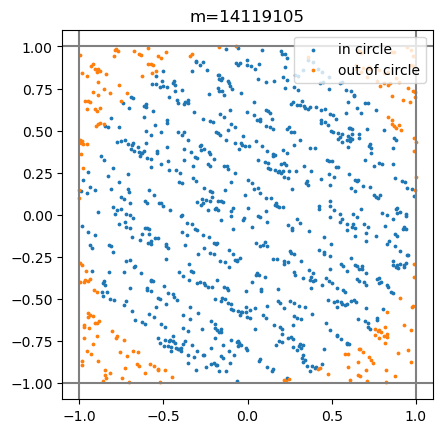

In [17]:
for m in [290358,45896,14119105]:
    plot_circle(n=1000,rs=LCG(43,m=m))
    plt.title(f'{m=}')
    plt.show()

### C) Estimating $\pi$

The funtion `get_points(n,rs)` gives us the split into points inside and outside of the circle.
Use the approximation that 

$$
\frac{\textrm{no. of points in square}}{\textrm{no. of points in circle}} \sim \frac{\textrm{area of square}}{\textrm{area of circle}}
$$

together with the formula for the circle area to estimate $\pi$. 

**Ex.C1** Compute $\pi$ from the samples. How accurate is do you expect your estimate to be at most for a given $n$?

See part D for the answer to this question.

In [18]:
def estimate_pi(n,rs):
    circle_points, _ = get_points(n,rs)
    pi_estimate = len(circle_points)/n*4
    return pi_estimate

In [19]:
estimate_pi(n=1000,rs=np.random.RandomState(42))

3.104

In [20]:
estimate_pi(n=10000,rs=np.random.RandomState(42))

3.1544

**Ex.C2** Compare this to the value of $\pi$ saved in numpy. Is the approximation good enough? How large of an $n$ do you need to get a good approximation? (The answers to these last two questions are studied in part D)

In [21]:
np.pi

3.141592653589793

### D) The error on the mean

We now want to get a sense of how close our estimate of $\pi$ is to the true $\pi$. For this, let us change our perspective a bit.

Consider $X$ the random variable which is either 0 or 1: It is 1 for a point sampled inside the circle and 0 for a point sampled ouside of it.
Since $X$ can take only two values, inside (1) and outside (0), we can interpret $X$ to be distributed as a Bernoulli distribution with parameter $p$ (where $p$ is the probability of sampling a point inside the circle).
Then, as you computed yourself above, we should have $\pi = 4p$, and that the expected value $\mathbb E X = \pi/4$.

Therefore, if we can estimate an approximate value of $p$ from samples of $X$, we can find an approximation of $\pi$.

**Ex.D1** Write a function which samples `n_samples` from the random variable $X$:

In [22]:
def sample_X(k_samples, rs):
    # Function to sample k_sample values in an array that are 0/1 
    # depending on whether the point fell into the circle or not.
    # k_samples: int
    # rs: random state to use for random sampling
    # 
    points = (rs.uniform(size=(k_samples,2)) * 2) - 1
    norm = np.linalg.norm(points,axis=1)
    is_in_circle = (norm<=1).flatten()
    
    return is_in_circle # array of size (k_samples,) for independent draws of G

We now want to sample $k$ `=k_samples` $X_i$ for different seeds and compare how they evolve as $k$ grows. We are interested in how the empirical mean $$G_k = \frac{1}{k} \sum_i X_i$$ behaves as a function of the sample size, and how it approaches the mean $\mathbb E X$. Recall that $\mathbb E G_k = \mathbb E X$, so we can use a bound on the error for $G_k$ that you saw in the lecture, to estimate the mean on $X$. 

**Ex.D2** Plot the value of $4 G_k$ as a function of $n$. We want to plot it by adding one step at a time, so the plot should show the evolution of $G_k$ as we include new samples in our mean (this means computing and plotting the running average). Exclude the first 10,000 steps in your plot, as the variation there makes it impossible to observe convergence.

**Ex.D3** For both `LCG` and `np.random`, check the previous plot for the samples on different seeds.

**Ex.D4** Compare to the values of `np.pi` in the plot via a horizontal line to the random walk of $G_k$. Do the means for the different random generators converge to $\pi$ as $k \to \infty$? What is the problem for the LCG?

*Hint: To compute the running average, check the function `np.cumsum`.*

*Hint: To test your code, start with a small number of $k$. If it works, make $k$ larger (and wait a bit longer) to make your analysis.*

We see below that the means converge to $\pi$ for the numpy random generator. Using LCG, we observe a periodic pattern appearing, which is an artefact of the generation method.

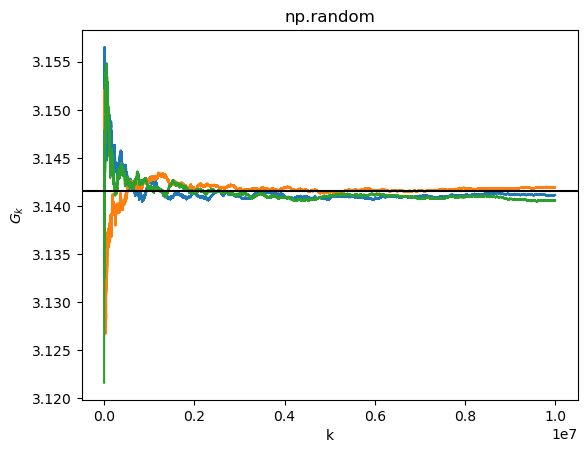

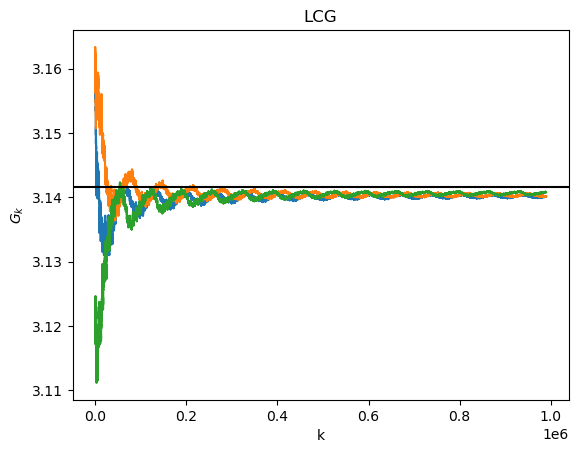

In [23]:
k_samples = 10000000
means = []
for seed in [134098,12380,4523]:
    is_in_circle = sample_X(k_samples, rs=np.random.RandomState(seed))
    mean = is_in_circle.cumsum()/np.arange(1,k_samples+1)
    plt.plot(4*mean[10000:])
plt.axhline(np.pi,c='black')
plt.xlabel('k')
plt.ylabel(r'$G_k$')
plt.title('np.random')
plt.show()

k_samples = 1000000
means = []
for seed in [134098,12380,4523]:
    is_in_circle = sample_X(k_samples, rs=LCG(seed))
    mean = is_in_circle.cumsum()/np.arange(1,k_samples+1)
    plt.plot(4*mean[10000:])
plt.axhline(np.pi,c='black')
plt.xlabel('k')
plt.ylabel(r'$G_k$')
plt.title('LCG')
plt.show()

Since the plot is difficult to read off in the vicinity of $\pi$, we plot instead the absolute difference between $G_k$ and $4 \pi$ as a function of $k$.


Recall the bound on the error in the mean we discussed during the lecture
$$
P\Big(|Y - \mathbb{E}Y| \geq \epsilon \Big) \leq \frac{Var(Y)}{\epsilon^2} \,.
$$

To apply it to our setting, set $Y=G_k$ and $\epsilon^2 = c^2 \cdot Var(G_k) = c \cdot \frac{1}{k} \pi \frac{1-\pi/4}{4}$, where $c$ is a non-negative constant:

$$
P\Big(|G_k - \pi/4| \geq c \cdot \frac{1}{\sqrt{k}}\sqrt{\pi \frac{1-\pi/4}{4}} \Big) \leq \frac{1}{c^2}
$$

**Ex.D5** Plot the difference $|G_k - \pi/4|$ as a function of $k$ for three random seeds from `np.random`. To see the scaling in $k$, set the axes to a log-log scale.

**Ex.D6** Also, plot the value of the bound (the rhs in the probability) for different values of $c$ and compare it to the evolution of the distance. Is the bound fullfilled? What are the spikes going low?

We see below that the bound is fulfilled (the bound with $c=5$ is never reached, while the bound for $c=2$ is sometimes reached). The spike are an artefact of $G_k$ crossing zero.

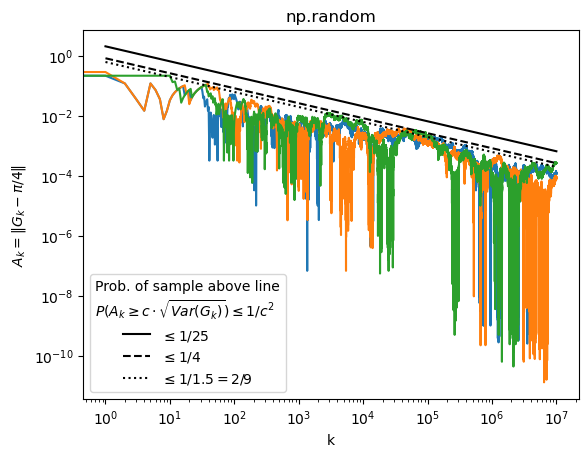

In [31]:
k_samples = 10000000
means = []
for seed in [134098,12380,4523]:
    is_in_circle = sample_X(k_samples, rs=np.random.RandomState(seed))
    mean = is_in_circle.cumsum()/np.arange(1,k_samples+1)
    plt.plot(np.abs(mean-np.pi/4))
    
k=np.arange(1,k_samples+1)
plt.plot(k,5*np.sqrt(np.pi*(1-np.pi/4)/4)*1/k**0.5,c='black',linestyle='solid',label=r'$\leq 1/25$')
plt.plot(k,2*np.sqrt(np.pi*(1-np.pi/4)/4)*1/k**0.5,c='black',linestyle='dashed',label=r'$\leq 1/4$')
plt.plot(k,1.5*np.sqrt(np.pi*(1-np.pi/4)/4)*1/k**0.5,c='black',linestyle='dotted',label=r'$\leq 1/1.5= 2/9$')
plt.legend(title='Prob. of sample above line\n'+ r'$P(A_k \geq c \cdot \sqrt{Var(G_k)}) \leq 1/c^2$')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel(r'$A_k = \| G_k - \pi/4\|$')
plt.title('np.random')
plt.show()

**Ex.D7** Repeat the same experiment for the LCG samples. What do you observe as $k$ grows? Why does this happen? (you need to set $k$ large enough).

Again, the LCG is not good for large n, as periodic patterns appear.

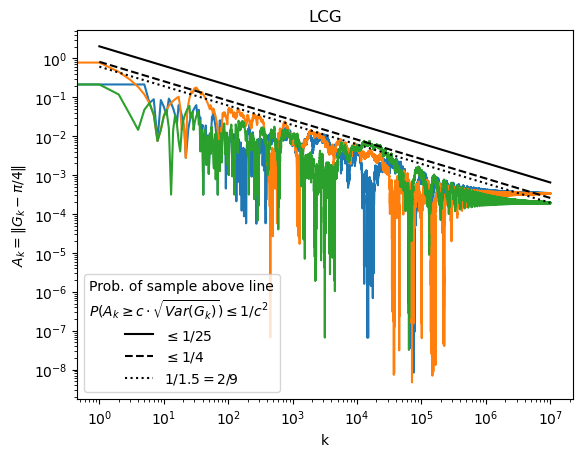

In [25]:
k_samples = 10000000
means = []
for seed in [134098,12380,4523]:
    is_in_circle = sample_X(k_samples, rs=LCG(seed))
    mean = is_in_circle.cumsum()/np.arange(1,k_samples+1)
    plt.plot(np.abs(mean-np.pi/4))
    
k=np.arange(1,k_samples+1,1000)
plt.plot(k,5*np.sqrt(np.pi*(1-np.pi/4)/4)*1/k**0.5,c='black',linestyle='solid',label=r'$\leq 1/25$')
plt.plot(k,2*np.sqrt(np.pi*(1-np.pi/4)/4)*1/k**0.5,c='black',linestyle='dashed',label=r'$\leq 1/4$')
plt.plot(k,1.5*np.sqrt(np.pi*(1-np.pi/4)/4)*1/k**0.5,c='black',linestyle='dotted',label=r'$1/1.5= 2/9$')
plt.legend(title='Prob. of sample above line\n'+ r'$P(A_k \geq c \cdot \sqrt{Var(G_k)}) \leq 1/c^2$',loc='lower left')
plt.xscale('log')
plt.yscale('log')
plt.xlabel('k')
plt.ylabel(r'$A_k = \|G_k - \pi/4\|$')
plt.title('LCG')
plt.show()

### E) The central limit theorem

In the lecture, we stated that the distribution of $G_k$ behaves with a given law for a given $k$: It behaves as a Gaussian distribution with a fixed mean and variance.  For large enough $k$ the samples follow the distribution
$$
    G_k \sim \mathcal{N}\Big(\mu= \pi/4; \sigma=\frac{1}{\sqrt{k}}\sqrt{Var(G_k)}\Big)
$$
In the last part of this exercise, we check that this is law is fullfilled.

**Ex.E1** Implement the gaussian pdf in numpy to be able to eventually compare it to the histogram of samples from $G_k$.

In [26]:
def gaussian(x,mu,sigma):
    # gaussian pdf for the mean mu, and standard deviation sigma, for x a numpy array
    return 1.0 / (sigma * np.sqrt(2 * np.pi)) * np.exp(-(x - mu)**2 / (2 * sigma**2))

gaussian(1.2,mu=1,sigma=0.3) # should return 1.0648266850745076

1.0648266850745076

**Ex.E2**  To look at empirical distribution of $G_k$ plot a histogram of the $n$ samples of $ _k$ you sample. 
Compare it to the Gaussian pdf you computed above.

**Ex.E3**  Try a few different values of $k$. Which size of $k$ is large enough to see the law appear?

*Hint: use the `density` parameter of the `plt.hist` function, to be able to compare it to the gaussian bdf you computed previously.*

From the figure below, we see that for $k=1000$ we already have a good match.

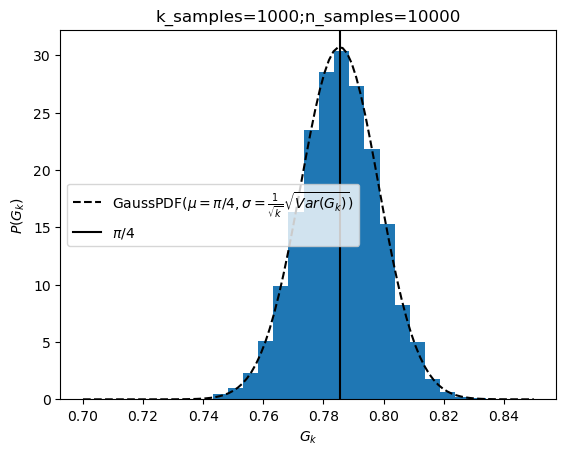

In [27]:
k_samples = 1000
means = []
n_samples = 10000
for seed in range(n_samples):
    is_in_circle = sample_X(k_samples, rs=np.random.RandomState(seed)).mean()
    means.append(is_in_circle)
    
x = np.linspace(0.7,0.85,100)
y = gaussian(x,mu=np.pi/4,sigma=1/k_samples**0.5*np.sqrt(np.pi*(1-np.pi/4)/4))
plt.plot(x,y,label=r'GaussPDF$(\mu=\pi/4,\sigma=\frac{1}{\sqrt{k}}\sqrt{Var(G_k)})$', c='black', linestyle='dashed')
plt.hist(means,density=True,bins=20)
plt.axvline(np.pi/4,c='black',label=r'$\pi/4$')
plt.xlabel(r'$ G_k$')
plt.ylabel(r'$P( G_k)$')
plt.title(f'{k_samples=};{n_samples=}')
plt.legend()
plt.show()